# Focus on mixed-phase clouds

Here limits are used to filter out numerical noise to some extent.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd 
import seaborn as sns

from scipy.stats import levene
from scipy.stats import kruskal

## 1. Data

In [12]:
fig_path='../../../plots/publication_plots/paper_wrapper_2023/'

In [13]:
df_mpc = pd.read_csv('../../../data/processed/df_all_tends_mpc_pn_and_pd.csv')
#df_pd = pd.read_csv('../../../data/processed/df_fr_tends_MJJA_S21.csv')

display(df_mpc.describe())

,Unnamed: 0,deposition_fr,sublimation_fr,rime_fr,homhet_fr,c_homfr_fr,fr_col,fr_eva_fr,g_to_h,r_freeze_fr,...,condensation_li,QI,QS,QG,QH,QR,QC,QV,frozen mass,liquid mass
count,7.010952e+06,7.010952e+06,7.010952e+06,7.010952e+06,7.010952e+06,7.010952e+06,7.010952e+06,7.010952e+06,7010952.0,7.010952e+06,...,7.010952e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06,2.478518e+06
mean,3.505476e+06,7.997092e-09,2.863615e-09,2.222998e-09,3.076820e-15,4.340415e-22,5.758405e-26,1.262465e-10,0.0,3.186716e-12,...,1.743039e-08,3.489096e-06,1.684625e-06,2.919854e-06,7.005221e-11,6.211121e-06,6.808945e-05,2.371318e-03,8.093645e-06,7.430057e-05
std,2.023888e+06,7.420829e-08,2.474184e-08,3.782703e-08,8.651641e-14,1.270860e-19,1.277217e-21,5.370330e-09,0.0,1.677395e-10,...,1.025564e-07,1.141944e-05,2.349557e-05,1.516999e-05,3.175577e-10,1.832907e-05,1.070989e-04,8.255319e-04,3.338546e-05,1.126077e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.109613e-19,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.243211e-24,0.000000e+00,3.116273e-04,1.000000e-08,1.000001e-08
25%,1.752738e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,8.325432e-08,8.363027e-10,9.933580e-12,2.185416e-17,2.854907e-08,0.000000e+00,1.728833e-03,1.013536e-07,2.919817e-07
50%,3.505476e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,4.050430e-07,9.629925e-10,6.521321e-10,3.340023e-13,2.666161e-07,8.264619e-06,2.369282e-03,4.688886e-07,1.767227e-05
75%,5.258213e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,2.165641e-06,3.479022e-08,9.001346e-10,4.645475e-11,3.180233e-06,1.021619e-04,2.990626e-03,2.606485e-06,1.086058e-04
max,7.010951e+06,2.713446e-06,7.448734e-07,3.839696e-06,1.591343e-10,8.673390e-17,1.325954e-19,5.926994e-07,0.0,9.300407e-08,...,7.951155e-06,2.095299e-04,7.091644e-04,2.756040e-04,3.932091e-08,2.736080e-04,8.688158e-04,5.307595e-03,7.399062e-04,8.845086e-04


## 2.  Can we show the WBF process?

In [14]:
# split df_mpc into two dataframes with one for cases where evaporation is happening and no deposition 
# and one where evaporation is happend and deposition is happening

df_mpc_evap_nodep = df_mpc[(df_mpc["evaporation_li"] > 10**-18) & (df_mpc["deposition_fr"] < 1e-22)]
df_mpc_evap_dep = df_mpc[(df_mpc["evaporation_li"] > 10**-18) & (df_mpc["deposition_fr"] > 1e-18)]

# do same for deposition and no evaporation and deposition and evaporation
df_mpc_dep_noevap = df_mpc[(df_mpc["evaporation_li"] < 1e-22) & (df_mpc["deposition_fr"] > 1e-18)]
df_mpc_dep_evap = df_mpc[(df_mpc["evaporation_li"] > 1e-18) & (df_mpc["deposition_fr"] > 1e-18)]


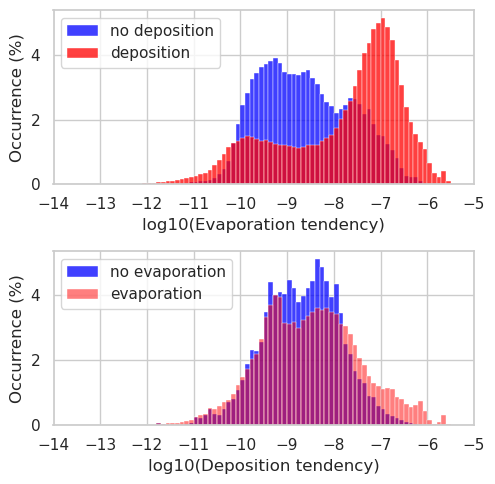

In [15]:
# make similar plot as above but make two subplots for evaporation and deposition
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,5))
sns.histplot(np.log10(df_mpc_evap_nodep["evaporation_li"]), bins=np.arange(-14,-5, 0.1), color="blue", 
             label="no deposition", stat="percent", ax=ax[0])
sns.histplot(np.log10(df_mpc_evap_dep["evaporation_li"]), bins=np.arange(-14,-5, 0.1), color="red",
              label="deposition", stat="percent", ax=ax[0])
ax[0].set_xlabel("log10(Evaporation tendency)")
ax[0].set_xlim(-14, -5)
ax[0].set_ylabel("Occurrence (%)")
ax[0].legend()

sns.histplot(np.log10(df_mpc_dep_noevap["deposition_fr"]), bins=np.arange(-14,-5, 0.1), color="blue",
                label="no evaporation", stat="percent", ax=ax[1])   
sns.histplot(np.log10(df_mpc_dep_evap["deposition_fr"]), bins=np.arange(-14,-5, 0.1), color="red",
                label="evaporation", stat="percent", ax=ax[1], alpha=0.5)
ax[1].set_xlabel("log10(Deposition tendency)")
ax[1].set_xlim(-14, -5)
ax[1].set_ylabel("Occurrence (%)")
ax[1].legend()
plt.tight_layout()
plt.show()


What one can see is that if evaporation and deposition happen at the same time then the evaporation mass will increase significantly but the deposition mass will not increase as much.
The bi-modal distribution is interesting.

In [16]:
# run a significance test to see if the two distributions are significantly different
# 1. check if variance is equal
# 2. if variance is equal, run a t-test
# 3. if variance is not equal, run kruskal-wallis test

# 1. check if variance is equal
levene(df_mpc_evap_nodep["evaporation_li"], df_mpc_evap_dep["evaporation_li"])
# p-value is 0.0, so variance is not equal

# 2. if variance is not equal, run kruskal-wallis test
stat, p = kruskal(df_mpc_evap_nodep["evaporation_li"], df_mpc_evap_dep["evaporation_li"])
# p-value is 0.0, so distributions are significantly different (at 95% confidence level)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=207403.006, p=0.000
Probably different distributions


In [17]:
# do same for deposition
levene(df_mpc_dep_noevap["deposition_fr"], df_mpc_dep_evap["deposition_fr"])
# p-value is 0.0, so variance is not equal

# 2. if variance is not equal, run kruskal-wallis test
stat, p = kruskal(df_mpc_dep_noevap["deposition_fr"], df_mpc_dep_evap["deposition_fr"])
# p-value is 0.0, so distributions are significantly different (at 95% confidence level)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


stat=8898.644, p=0.000
Probably different distributions


Check the connection of the frozen mass and the liquid mass

In [18]:
# as these are the MPC cases, the frozen and liquid mass are actually by default above 10^-8
df_mpc_fr_mass_noevap = df_mpc[(df_mpc["deposition_fr"] > 1e-18) & (df_mpc["evaporation_li"] < 1e-22) & (df_mpc["frozen mass"] > 1e-8)]
df_mpc_fr_mass_evap = df_mpc[(df_mpc["deposition_fr"] > 1e-18) & (df_mpc["evaporation_li"] > 1e-18) & (df_mpc["frozen mass"] > 1e-8)]

df_mpc_li_mass_dep_noevap = df_mpc[(df_mpc["deposition_fr"] > 1e-18) & (df_mpc["evaporation_li"] < 1e-22) & (df_mpc["liquid mass"] > 1e-8)]
df_mpc_li_mass_dep_evap = df_mpc[((df_mpc["deposition_fr"] > 1e-18) & (df_mpc["evaporation_li"] > 1e-18)) & (df_mpc["liquid mass"] > 1e-8)]

/home/tkiszler/sw/miniconda3/envs/python3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/tkiszler/sw/miniconda3/envs/python3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


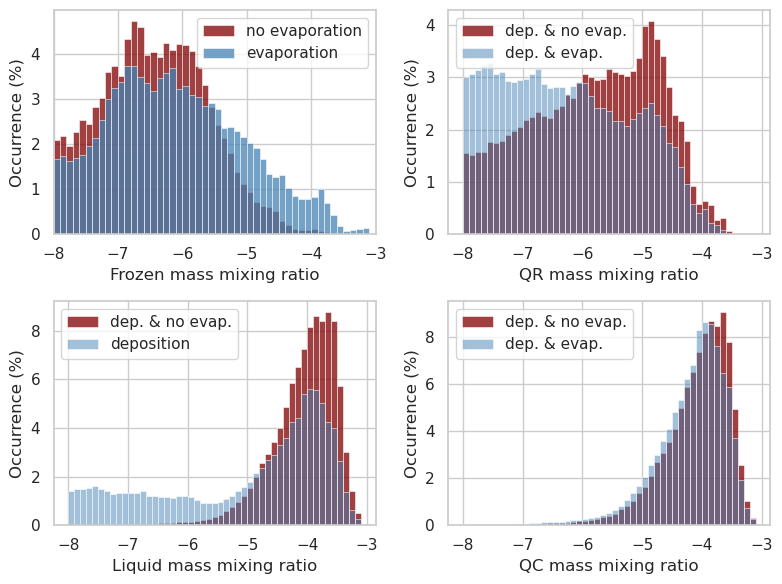

In [19]:
# make similar plot as above but make two subplots for evaporation and deposition
sns.set_theme(style="whitegrid")
mass_bins = np.arange(-8,-3, 0.1)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
sns.histplot(np.log10(df_mpc_fr_mass_noevap["frozen mass"]), bins=mass_bins, color="maroon", 
             label="no evaporation", stat="percent", ax=ax[0,0])
sns.histplot(np.log10(df_mpc_fr_mass_evap["frozen mass"]), bins=mass_bins, color="steelblue",
              label="evaporation", stat="percent", ax=ax[0,0])
ax[0,0].set_xlabel("Frozen mass mixing ratio")
ax[0,0].set_xlim(-8, -3)
ax[0,0].set_ylabel("Occurrence (%)")
ax[0,0].legend()

sns.histplot(np.log10(df_mpc_li_mass_dep_noevap["liquid mass"]), bins=mass_bins, color="maroon",
                label="dep. & no evap.", stat="percent", ax=ax[1,0])   
sns.histplot(np.log10(df_mpc_li_mass_dep_evap["liquid mass"]), bins=mass_bins, color="steelblue",
                label="deposition", stat="percent", ax=ax[1,0], alpha=0.5)
ax[1,0].set_xlabel("Liquid mass mixing ratio")
#ax[1].set_xlim(-14, -5)
ax[1,0].set_ylabel("Occurrence (%)")
ax[1,0].legend()

sns.histplot(np.log10(df_mpc_li_mass_dep_noevap["QR"]), bins=mass_bins, color="maroon",
                label="dep. & no evap.", stat="percent", ax=ax[0,1])
sns.histplot(np.log10(df_mpc_li_mass_dep_evap["QR"]), bins=mass_bins, color="steelblue",
                label="dep. & evap.", stat="percent", ax=ax[0,1], alpha=0.5) 
ax[0,1].set_xlabel("QR mass mixing ratio")
ax[0,1].set_ylabel("Occurrence (%)")
ax[0,1].legend()

sns.histplot(np.log10(df_mpc_li_mass_dep_noevap["QC"]), bins=mass_bins, color="maroon",
                label="dep. & no evap.", stat="percent", ax=ax[1,1])
sns.histplot(np.log10(df_mpc_li_mass_dep_evap["QC"]), bins=mass_bins, color="steelblue",
                label="dep. & evap.", stat="percent", ax=ax[1,1], alpha=0.5) 
ax[1,1].set_xlabel("QC mass mixing ratio")
ax[1,1].set_ylabel("Occurrence (%)")
ax[1,1].legend()


plt.tight_layout()
plt.show()

When there is no deposition the air is likely unsaturated. This can be the case where there is precipitation which falls down into unsaturated air. Therefore if no deposition is happening then we are looking at grid boxes with rain and not cloud droplets. So this doesn't really help to understand if the water vapour which was produced by evaporation leads to an increased ice mass.

We can now try to quantify how much the frozen mass is higher when evaporation is given than when it is not given.

In [20]:
print(df_mpc_fr_mass_noevap["frozen mass"].sum() - df_mpc_fr_mass_evap["frozen mass"].sum()) # 16.97 kg/kg 

print(df_mpc_evap_dep["evaporation_li"].sum() - df_mpc_evap_nodep["evaporation_li"].sum())

print(df_mpc_dep_evap["deposition_fr"].sum() - df_mpc_dep_noevap["deposition_fr"].sum())
#df_mpc_li_mass_nodep["liquid mass"].sum() - df_mpc_li_mass_dep["liquid mass"].sum()

-11.653020002108775
0.11705665707531962
0.04227827303959365


So the frozen mass is in sum 11.65 kg/kg higher if evaporation is happening. 

The sum of evaporated liquid is higher when deposition is occurring. 

The sum of deposition is higher when evaporation is occuring. 

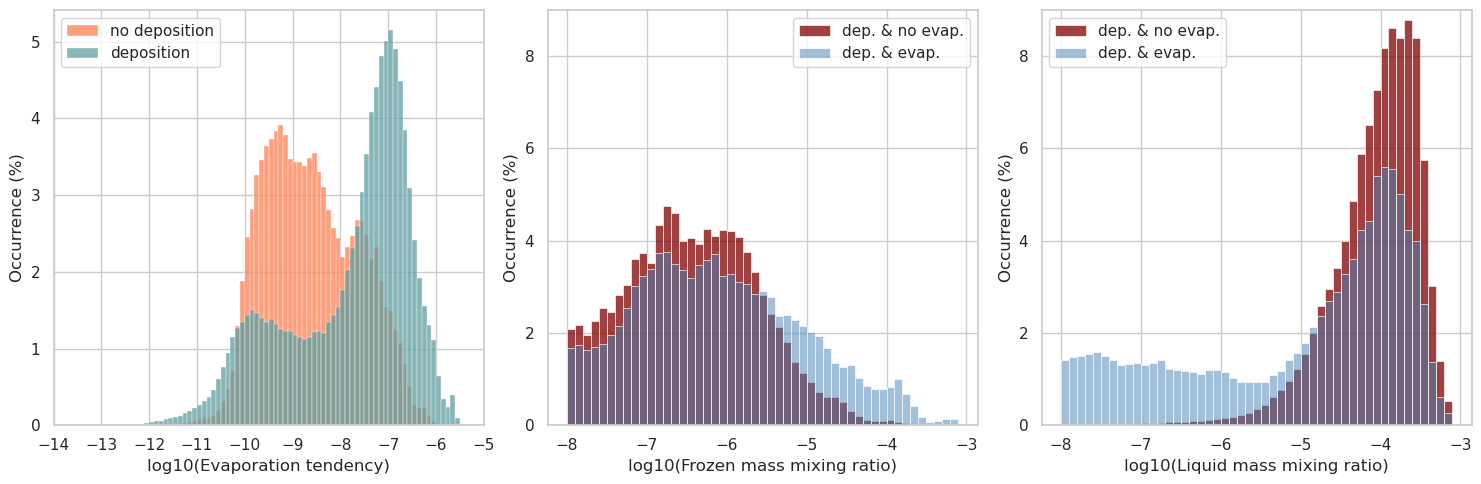

In [21]:
# make similar plot as above but make two subplots for evaporation and deposition
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.histplot(np.log10(df_mpc_evap_nodep["evaporation_li"]), bins=np.arange(-14,-5, 0.1), color="coral", 
             label="no deposition", stat="percent", ax=ax[0])
sns.histplot(np.log10(df_mpc_evap_dep["evaporation_li"]), bins=np.arange(-14,-5, 0.1), color="cadetblue",
              label="deposition", stat="percent", ax=ax[0])
ax[0].set_xlabel("log10(Evaporation tendency)")
ax[0].set_xlim(-14, -5)
ax[0].set_ylabel("Occurrence (%)")
ax[0].legend()

sns.histplot(np.log10(df_mpc_li_mass_dep_noevap["frozen mass"]), bins=mass_bins, color="maroon",
                label="dep. & no evap.", stat="percent", ax=ax[1])
sns.histplot(np.log10(df_mpc_li_mass_dep_evap["frozen mass"]), bins=mass_bins, color="steelblue",
                label="dep. & evap.", stat="percent", ax=ax[1], alpha=0.5) 
ax[1].set_xlabel("log10(Frozen mass mixing ratio)")
ax[1].set_ylabel("Occurrence (%)")
ax[1].set_ylim(0,9)
# only write every second y tick label
ax[1].set_yticks(ax[1].get_yticks()[::2])
ax[1].legend()

sns.histplot(np.log10(df_mpc_li_mass_dep_noevap["liquid mass"]), bins=mass_bins, color="maroon",
                label="dep. & no evap.", stat="percent", ax=ax[2])
sns.histplot(np.log10(df_mpc_li_mass_dep_evap["liquid mass"]), bins=mass_bins, color="steelblue",
                label="dep. & evap.", stat="percent", ax=ax[2], alpha=0.5) 
ax[2].set_xlabel("log10(Liquid mass mixing ratio)")
ax[2].set_ylabel("Occurrence (%)")
ax[2].set_ylim(0,9)
# write only every second y tick label
ax[2].set_yticks(ax[2].get_yticks()[::2])
ax[2].legend()

# add letters to subplots (a), (b), (c)
ax[0].text(-0.1, 1.1, '(a)', transform=ax[0].transAxes, size=12)
ax[1].text(-0.1, 1.1, '(b)', transform=ax[1].transAxes, size=12)
ax[2].text(-0.1, 1.1, '(c)', transform=ax[2].transAxes, size=12)

plt.savefig(fig_path + "fig_06_mpc_wbf.png", dpi=300, bbox_inches='tight',format='png' )
plt.savefig(fig_path + "fig_06_mpc_wbf.pdf", dpi=300, bbox_inches='tight',format='pdf' )
plt.tight_layout()
plt.show()